In [1]:
# Imports
import json
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression 
from sklearn.metrics import (
                            classification_report, mean_absolute_error, mean_squared_error, r2_score, 
                            accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            )
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
print("✅ Imports loaded")

✅ Imports loaded


In [2]:
ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = Path("artifacts/figures")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
X_train_reg_views = np.load(ARTIFACTS_DIR / 'X_train_reg_Views.npz')['data']
X_test_reg_views = np.load(ARTIFACTS_DIR / 'X_test_reg_Views.npz')['data']
y_train_reg_views = np.load(ARTIFACTS_DIR / 'y_train_reg_Views.npz')['data']
y_test_reg_views = np.load(ARTIFACTS_DIR / 'y_test_reg_Views.npz')['data']

X_train_reg_likes = np.load(ARTIFACTS_DIR / 'X_train_reg_Likes.npz')['data']
X_test_reg_likes = np.load(ARTIFACTS_DIR / 'X_test_reg_Likes.npz')['data']
y_train_reg_likes = np.load(ARTIFACTS_DIR / 'y_train_reg_Likes.npz')['data']
y_test_reg_likes = np.load(ARTIFACTS_DIR / 'y_test_reg_Likes.npz')['data']

X_train_reg_comments = np.load(ARTIFACTS_DIR / 'X_train_reg_Comments.npz')['data']
X_test_reg_comments = np.load(ARTIFACTS_DIR / 'X_test_reg_Comments.npz')['data']
y_train_reg_comments = np.load(ARTIFACTS_DIR / 'y_train_reg_Comments.npz')['data']
y_test_reg_comments = np.load(ARTIFACTS_DIR / 'y_test_reg_Comments.npz')['data']

X_train_reg_shares = np.load(ARTIFACTS_DIR / 'X_train_reg_Shares.npz')['data']
X_test_reg_shares = np.load(ARTIFACTS_DIR / 'X_test_reg_Shares.npz')['data']
y_train_reg_shares = np.load(ARTIFACTS_DIR / 'y_train_reg_Shares.npz')['data']
y_test_reg_shares = np.load(ARTIFACTS_DIR / 'y_test_reg_Shares.npz')['data']

X_train_cls = np.load(ARTIFACTS_DIR / 'X_train_cls_classification.npz')['data']
X_test_cls = np.load(ARTIFACTS_DIR / 'X_test_cls_classification.npz')['data']
y_train_cls = np.load(ARTIFACTS_DIR / 'y_train_cls_classification.npz')['data']
y_test_cls = np.load(ARTIFACTS_DIR / 'y_test_cls_classification.npz')['data']




print("Regression arrays loaded for Views:")
print(f"   X_train : {X_train_reg_views.shape}, X_test : {X_test_reg_views.shape}")
print(f"   y_train : {y_train_reg_views.shape}, y_test : {y_test_reg_views.shape}")

print("Regression arrays loaded for Likes:")
print(f"   X_train : {X_train_reg_likes.shape}, X_test : {X_test_reg_likes.shape}")
print(f"   y_train : {y_train_reg_likes.shape}, y_test : {y_test_reg_likes.shape}")

print("Regression arrays loaded for Shares:")
print(f"   X_train : {X_train_reg_shares.shape}, X_test : {X_test_reg_shares.shape}")
print(f"   y_train : {y_train_reg_shares.shape}, y_test : {y_test_reg_shares.shape}")

print("Regression arrays loaded for Comments:")
print(f"   X_train : {X_train_reg_comments.shape}, X_test : {X_test_reg_comments.shape}")
print(f"   y_train : {y_train_reg_comments.shape}, y_test : {y_test_reg_comments.shape}")

print("\nClassification arrays loaded:")
print(f"   X_train : {X_train_cls.shape}, X_test : {X_test_cls.shape}")
print(f"   y_train : {y_train_cls.shape}, y_test : {y_test_cls.shape}")


# Load FEATURE NAMES

with open(ARTIFACTS_DIR / "feature_names-classification.json", "r") as f:
    feature_names_cls = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Views.json", "r") as f:
    feature_names_reg_views = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Likes.json", "r") as f:
    feature_names_reg_likes = json.load(f)
    
with open(ARTIFACTS_DIR / "feature_names-Shares.json", "r") as f:
    feature_names_reg_shares = json.load(f)

with open(ARTIFACTS_DIR / "feature_names-Comments.json", "r") as f:
    feature_names_reg_comments = json.load(f)
    




# TODO : Implement confusion matrix visualization function

Regression arrays loaded for Views:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Likes:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Shares:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)
Regression arrays loaded for Comments:
   X_train : (3784, 53), X_test : (946, 53)
   y_train : (3784,), y_test : (946,)

Classification arrays loaded:
   X_train : (3784, 50), X_test : (946, 50)
   y_train : (3784,), y_test : (946,)


In [4]:
X_train_df = pd.DataFrame(X_train_reg_views)
X_train_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.324862,-0.061558,1.342143,-0.785723,0.468561,1.979219,1.791705,-1.031785,-1.294538,-1.405355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.548641,-0.402533,-1.034651,0.573057,-1.786181,-0.883814,1.551390,0.718034,-0.471216,1.755303,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.217937,-0.684645,-0.452817,-0.589055,-1.786181,1.979219,0.562334,0.718034,-1.294538,-1.454774,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.788329,-1.121102,0.195195,0.923092,-1.786181,0.014246,-0.139697,0.718034,-1.684183,0.012497,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.219738,-0.573932,-0.630838,-0.246234,0.735380,0.014246,-1.100668,-0.956804,-1.684183,-0.773091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.440279,0.757031,1.712516,0.243388,0.470941,-0.883814,-0.066416,1.200298,-0.471216,-0.124690,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96,0.745412,-0.505063,0.851849,0.573057,-1.786181,-0.608507,1.551390,0.718034,0.681186,1.755303,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97,-0.867956,-0.222504,0.132249,-0.246234,0.470941,-0.131382,-1.100668,1.200298,1.269466,-0.773091,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,-0.001461,1.594152,-0.853258,0.573057,0.735380,-0.883814,1.551390,-0.956804,-0.471216,1.755303,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
y_train_df = pd.DataFrame(y_train_reg_views)
y_train_df.head(100)

,0
0,826021
1,338623
2,4754509
3,4892331
4,3399161
...,...
95,4290567
96,459654
97,3079923
98,4171736


In [6]:
X_train_views_df = pd.DataFrame(X_train_reg_views)



constant_cols = [c for c in X_train_views_df.columns if X_train_views_df[c].nunique() <= 1]
constant_cols


[]

## Regression & Classification Baseline

In [7]:
class SupervisedBaselineModels:
    def __init__(self, X_train, X_test, y_train, y_test, feature_names, task, pred):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.task = task
        self.pred = pred
        
        # Baseline Regression Models
        self.reg_models = {
            'LinearRegression': LinearRegression(),
            'Ridge_1': Ridge(alpha=1, random_state=RANDOM_STATE),
            'Ridge_10': Ridge(alpha=10, random_state=RANDOM_STATE),
            'Ridge_100': Ridge(alpha=100, random_state=RANDOM_STATE),
        }
        
        # Baseline Classification Models
        self.cls_models = { 
                           'LogisticRegression': LogisticRegression( 
                                                    multi_class='multinomial', 
                                                    max_iter=200, 
                                                    random_state=RANDOM_STATE, 
                                                    class_weight="balanced" ), 
                           'DecisionTree': DecisionTreeClassifier( 
                                                    class_weight="balanced", #Reduced class imbalances
                                                    max_depth=6, 
                                                    random_state=RANDOM_STATE ), 
                           }

        
        self.reg_results = []
        self.cls_results = []
        
        
    # -------------------------------------------------
    # TRAIN & EVALUATE
    # -------------------------------------------------
    def train_and_evaluate(self):
        
        # -------------------------------------------------
        # REGRESSION
        # -------------------------------------------------
        if self.task == 'regression':
        
            
            for name, model in self.reg_models.items():
                print(f"\n🔵 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_mae = mean_absolute_error(self.y_train, y_pred_train)
                test_mae = mean_absolute_error(self.y_test, y_pred_test)

                train_rmse = np.sqrt(mean_squared_error(self.y_train, y_pred_train))
                test_rmse = np.sqrt(mean_squared_error(self.y_test, y_pred_test))

                train_r2 = r2_score(self.y_train, y_pred_train)
                test_r2 = r2_score(self.y_test, y_pred_test)

                # Save Results
                self.reg_results.append({
                    'Model': name,
                    'Train MAE': train_mae,
                    'Train RMSE': train_rmse,
                    'Train R2': train_r2,
                    'Test MAE': test_mae,
                    'Test RMSE': test_rmse,   
                    'Test R2': test_r2
                })

                print(f"   Test MAE: {test_mae:.2f} | Test RMSE: {test_rmse:.2f} | Test R2: {test_r2:.2f}")

        
        # -------------------------------------------------
        # CLASSIFICATION
        # -------------------------------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                print(f"\n🟢 Training {name} ...")
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred_train = model.predict(self.X_train)
                y_pred_test = model.predict(self.X_test)

                # Metrics
                train_acc = accuracy_score(self.y_train, y_pred_train)
                test_acc = accuracy_score(self.y_test, y_pred_test)

                train_precision = precision_score(self.y_train, y_pred_train, average='weighted')
                test_precision = precision_score(self.y_test, y_pred_test, average='weighted')

                train_recall = recall_score(self.y_train, y_pred_train, average='weighted')
                test_recall = recall_score(self.y_test, y_pred_test, average='weighted')

                train_f1 = f1_score(self.y_train, y_pred_train, average='weighted')
                test_f1 = f1_score(self.y_test, y_pred_test, average='weighted')

                # Save Results
                self.cls_results.append({
                    'Model': name,
                    'Train Accuracy': train_acc,
                    'Train Precision': train_precision,
                    'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Accuracy': test_acc,
                    'Test Precision': test_precision,
                    'Test Recall': test_recall,
                    'Test F1 Score': test_f1
                })

                
                print(f"   Test Accuracy: {test_acc:.2f} | Test Precision: {test_precision:.2f} | Test Recall: {test_recall:.2f} | Test F1: {test_f1:.2f}")
                
                print("\n================ TRAIN METRICS ================\n")
                print(classification_report(self.y_train, y_pred_train))

                print("\n================ TEST METRICS ================\n")
                print(classification_report(self.y_test, y_pred_test))

                # Confusion Matrix (test)
                print("\n============== TEST CONFUSION MATRIX ==============\n")
                cm = confusion_matrix(self.y_test, y_pred_test)
                print(cm)
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                plt.title(F"Confusion Matrix - {name}")
                plt.savefig(FIGURES_DIR / f'Confusion Matrix - {name}.png', dpi=150, bbox_inches='tight')
                plt.show()
                    
    # -------------------------------------------------
    # RESULTS DISPLAY & SAVE
    # -------------------------------------------------
    def results(self):
        
        # -------------------------------------------------
        # REGRESSION RESULTS
        # -------------------------------------------------
        if self.task == 'regression':
            df_reg = pd.DataFrame(self.reg_results)
            print("\n📘 Regression Baseline Results:")
            print(df_reg.to_string(index=False))

            with open(ARTIFACTS_DIR / f"metrics_baseline_regression-{self.pred}.json", "w") as f:
                json.dump(df_reg.to_dict(orient="records"), f, indent=2)
        
        # -------------------------------------------------v
        # CLASSIFICATION RESULTS
        # -------------------------------------------------
        if self.task == 'classification':
            df_cls = pd.DataFrame(self.cls_results)
            print("\n📗 Classification Baseline Results:")
            print(df_cls.to_string(index=False))

            with open(ARTIFACTS_DIR / f"metrics_baseline_classification-{self.pred}.json", "w") as f:
                json.dump(df_cls.to_dict(orient="records"), f, indent=2)
                
        # TODO : Fix the overwriting problem    
                # Fix feature importance
                
    def feature_importance(self):
    # --------------------------
    # Classification
    # --------------------------
        if self.task == 'classification':
            for name, model in self.cls_models.items():
                if hasattr(model, 'coef_'):
                    coefficients = np.abs(model.coef_)
                elif hasattr(model, 'feature_importances_'):
                    coefficients = np.abs(model.feature_importances_)
                else:
                    print(f"No importance available for {name}")
                    continue

                mean_coefficients = coefficients.mean(axis=0)

                feature_importance = pd.DataFrame({
                    'Feature': self.feature_names,
                    'Importance': mean_coefficients
                }).sort_values(by='Importance', ascending=False)

                print(f"\nFeature Importances (Classification) - {name}")
                print(feature_importance.head(10))

                # Plot top 20
                plt.figure(figsize=(10, 6))
                sns.barplot(
                    x='Importance', y='Feature',
                    data=feature_importance.nlargest(20, 'Importance'),
                    palette='coolwarm'
                )
                plt.title(f"Top 20 Feature Importances ({name})")
                plt.xlabel("Importance")
                plt.ylabel("Feature")
                plt.savefig(FIGURES_DIR / f'Feature Importance-{name}.png', dpi=150, bbox_inches='tight')
                plt.tight_layout()
                plt.show()

        # --------------------------
        # Regression
        # --------------------------
        elif self.task == 'regression':
            for target, model in self.reg_models.items():  # assume self.reg_models[target] exists
                if hasattr(model, 'coef_'):
                    coefs = model.coef_
                    
                    # If multi-target (n_targets, n_features), take one target at a time
                    if coefs.ndim > 1:
                        for i, single_coefs in enumerate(coefs):
                            fi_df = pd.DataFrame({
                                'Feature': self.feature_names,
                                'Importance': np.abs(single_coefs)
                            }).sort_values(by='Importance', ascending=False)
                            print(f"\nFeature Importances for {target} (output {i}):")
                            print(fi_df.head(10))

                            # Plot top 20
                            plt.figure(figsize=(10, 6))
                            sns.barplot(
                                x='Importance', y='Feature',
                                data=fi_df.nlargest(20, 'Importance'),
                                palette='coolwarm'
                            )
                            plt.title(f"Top 20 Feature Importances for {target} (output {i})")
                            plt.xlabel("Importance")
                            plt.ylabel("Feature")
                            plt.tight_layout()                                                        
                            plt.savefig(FIGURES_DIR / f'Feature Importance-{target}.png', dpi=150, bbox_inches='tight')
                            plt.show()
                    else:
                        fi_df = pd.DataFrame({
                            'Feature': self.feature_names,
                            'Importance': np.abs(coefs)
                        }).sort_values(by='Importance', ascending=False)

                        print(f"\nFeature Importances for {target}:")
                        print(fi_df.head(10))

                        # Plot top 20
                        plt.figure(figsize=(10, 6))
                        sns.barplot(
                            x='Importance', y='Feature',
                            data=fi_df.nlargest(20, 'Importance'),
                            palette='coolwarm'
                        )
                        plt.title(f"Top 20 Feature Importances for {target}")
                        plt.xlabel("Importance")
                        plt.ylabel("Feature")
                        plt.tight_layout()
                        plt.savefig(FIGURES_DIR / f'Feature Importance-{target}.png', dpi=150, bbox_inches='tight')
                        plt.show()
                else:
                    print(f"No coefficient available for {target}")   



=== Regression Baseline Models on Views ===

🔵 Training LinearRegression ...
   Test MAE: 1238939.17 | Test RMSE: 1423653.73 | Test R2: -0.02

🔵 Training Ridge_1 ...
   Test MAE: 1238931.75 | Test RMSE: 1423645.77 | Test R2: -0.02

🔵 Training Ridge_10 ...
   Test MAE: 1238866.72 | Test RMSE: 1423575.81 | Test R2: -0.02

🔵 Training Ridge_100 ...
   Test MAE: 1238348.47 | Test RMSE: 1422994.65 | Test R2: -0.02

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 1.184622e+06 1.369417e+06  0.014982 1.238939e+06 1.423654e+06 -0.017779
         Ridge_1 1.184624e+06 1.369417e+06  0.014982 1.238932e+06 1.423646e+06 -0.017768
        Ridge_10 1.184637e+06 1.369418e+06  0.014982 1.238867e+06 1.423576e+06 -0.017667
       Ridge_100 1.184761e+06 1.369436e+06  0.014955 1.238348e+06 1.422995e+06 -0.016837

Feature Importances for LinearRegression:
                     Feature    Importance
21           views_per_m

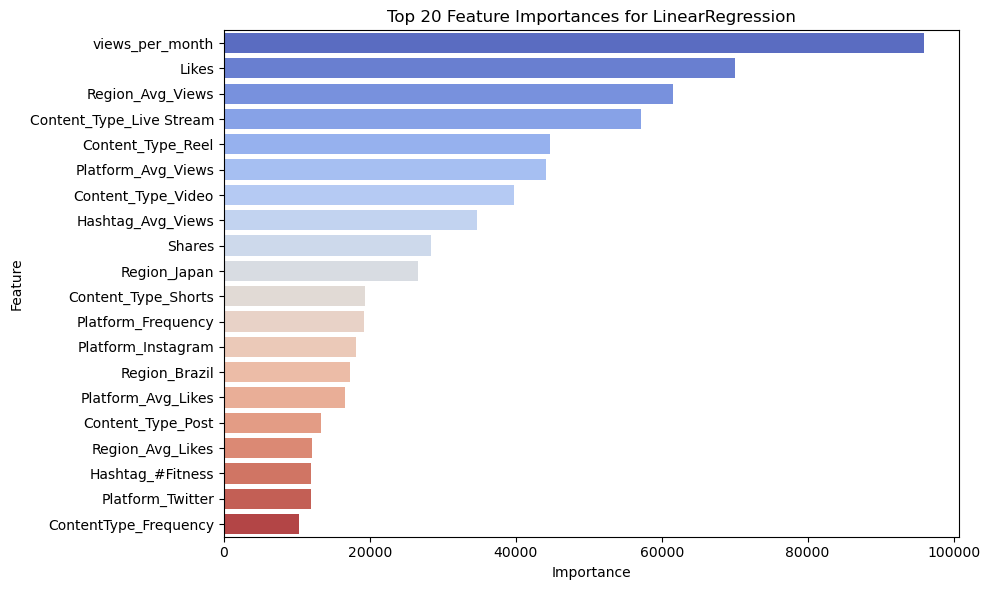


Feature Importances for Ridge_1:
                     Feature    Importance
21           views_per_month  95884.768035
0                      Likes  70061.636979
5           Region_Avg_Views  61493.998745
47  Content_Type_Live Stream  57018.529141
49         Content_Type_Reel  44419.814982
4         Platform_Avg_Views  44063.543892
52        Content_Type_Video  39704.061441
3          Hashtag_Avg_Views  34626.672136
1                     Shares  28342.441411
44              Region_Japan  26550.773563


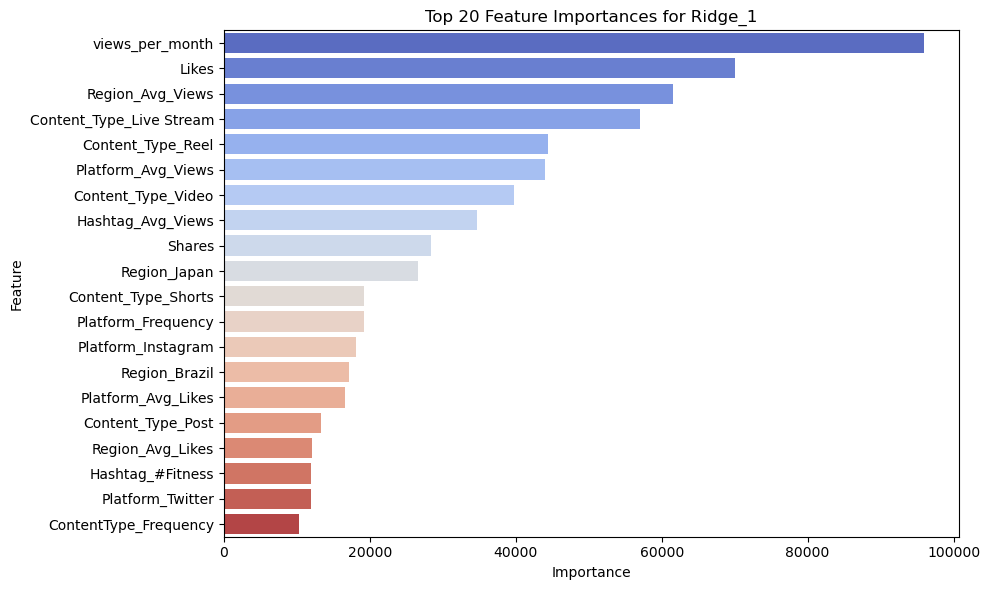


Feature Importances for Ridge_10:
                     Feature    Importance
21           views_per_month  95599.145135
0                      Likes  69883.052466
5           Region_Avg_Views  61268.557104
47  Content_Type_Live Stream  56171.779526
4         Platform_Avg_Views  43801.350028
49         Content_Type_Reel  42622.654886
52        Content_Type_Video  39337.923080
3          Hashtag_Avg_Views  34551.186402
1                     Shares  28295.567585
44              Region_Japan  26271.355794


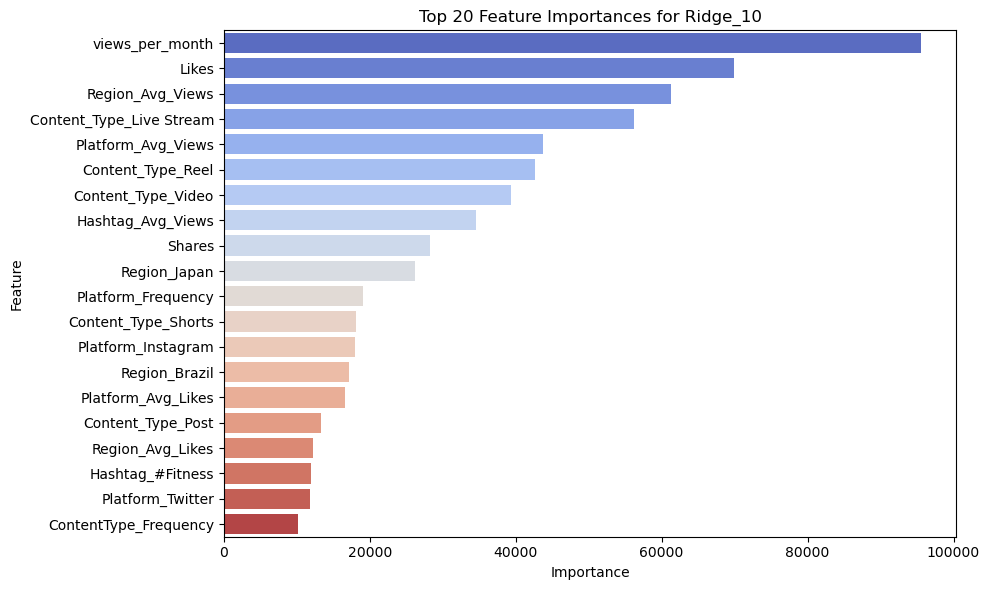


Feature Importances for Ridge_100:
                     Feature    Importance
21           views_per_month  92844.198291
0                      Likes  68167.920961
5           Region_Avg_Views  59194.084103
47  Content_Type_Live Stream  48911.007021
4         Platform_Avg_Views  41847.771081
52        Content_Type_Video  36035.535794
3          Hashtag_Avg_Views  33767.247027
49         Content_Type_Reel  30238.537174
1                     Shares  27798.288118
44              Region_Japan  23769.878585


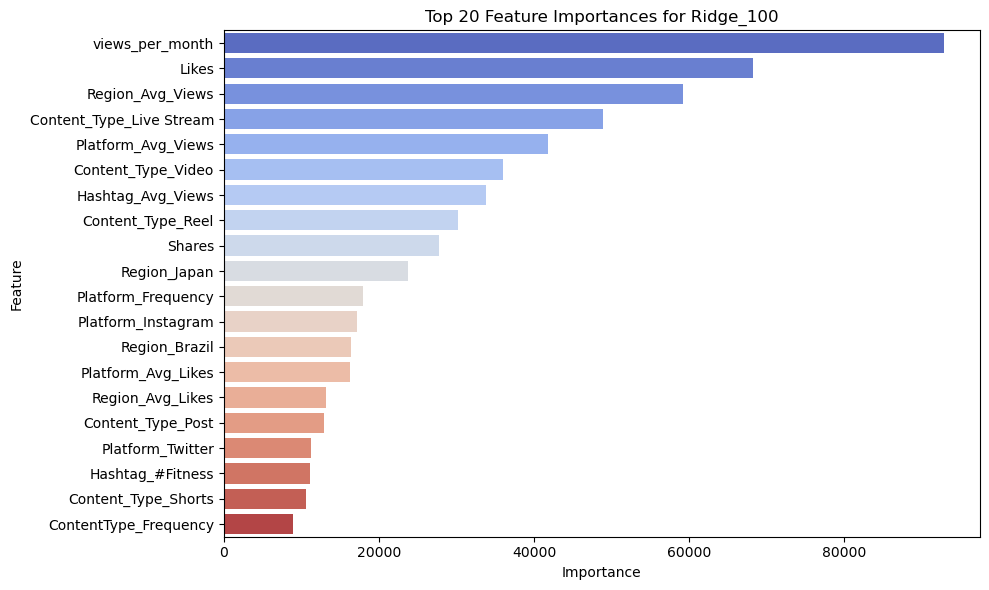


=== Regression Baseline Models on Likes ===

🔵 Training LinearRegression ...
   Test MAE: 126606.51 | Test RMSE: 146618.39 | Test R2: -0.01

🔵 Training Ridge_1 ...
   Test MAE: 126606.49 | Test RMSE: 146618.11 | Test R2: -0.01

🔵 Training Ridge_10 ...
   Test MAE: 126606.33 | Test RMSE: 146615.61 | Test R2: -0.01

🔵 Training Ridge_100 ...
   Test MAE: 126607.03 | Test RMSE: 146589.69 | Test R2: -0.01

📘 Regression Baseline Results:
           Model     Train MAE    Train RMSE  Train R2      Test MAE     Test RMSE   Test R2
LinearRegression 123000.133133 142785.652025  0.014896 126606.508820 146618.386899 -0.009312
         Ridge_1 123000.452813 142785.652417  0.014896 126606.488109 146618.110969 -0.009308
        Ridge_10 123003.255983 142785.688779  0.014896 126606.332889 146615.608111 -0.009273
       Ridge_100 123027.061451 142787.890769  0.014865 126607.034025 146589.687195 -0.008917

Feature Importances for LinearRegression:
                     Feature    Importance
22          

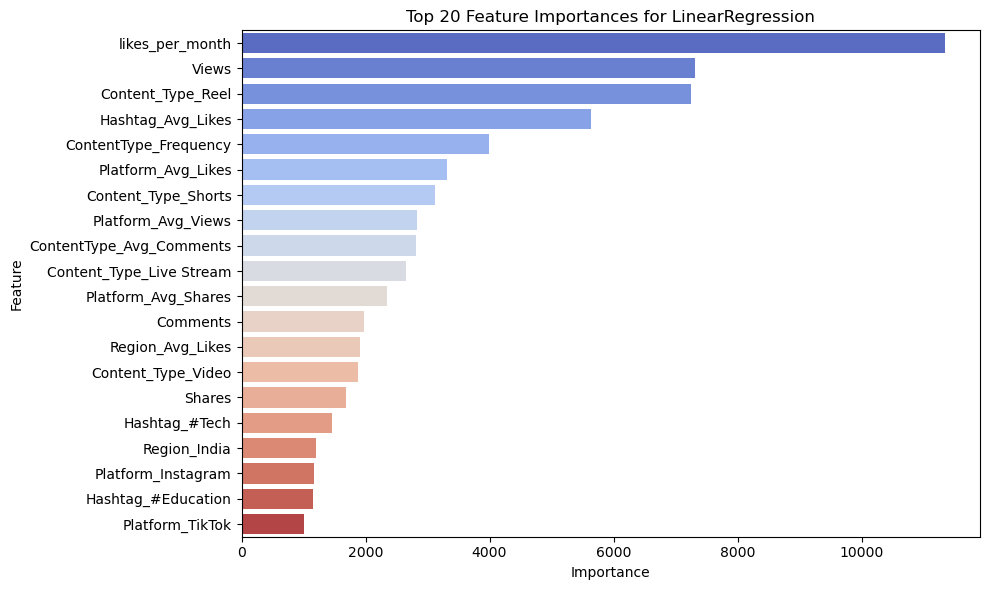


Feature Importances for Ridge_1:
                     Feature    Importance
22           likes_per_month  11339.005276
0                      Views   7305.466367
49         Content_Type_Reel   7219.869022
6          Hashtag_Avg_Likes   5628.284010
19     ContentType_Frequency   3992.077901
7         Platform_Avg_Likes   3311.237464
50       Content_Type_Shorts   3094.755391
4         Platform_Avg_Views   2823.329363
15  ContentType_Avg_Comments   2808.333946
47  Content_Type_Live Stream   2653.738767


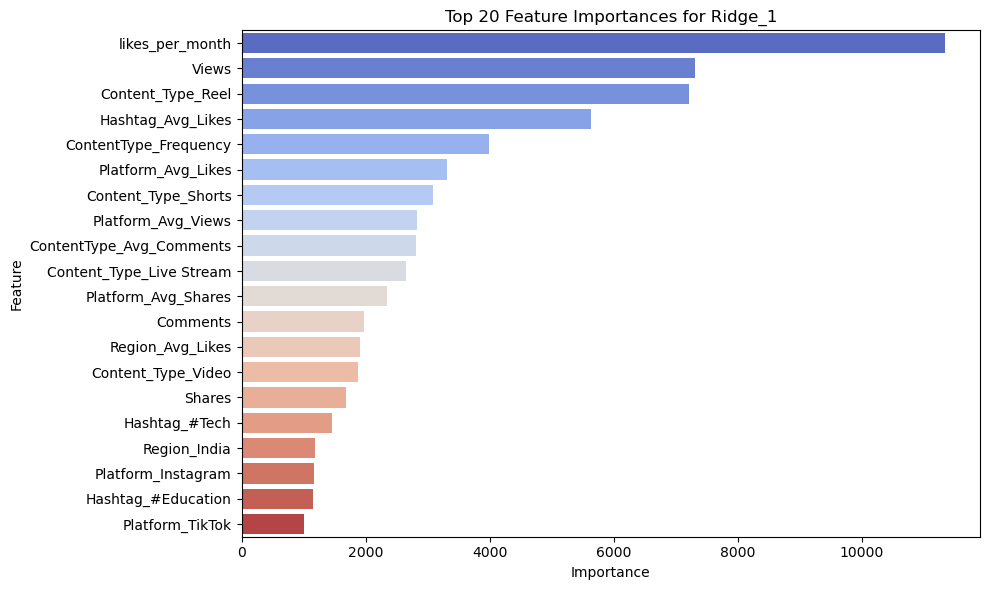


Feature Importances for Ridge_10:
                     Feature    Importance
22           likes_per_month  11306.758268
0                      Views   7286.851181
49         Content_Type_Reel   6952.115408
6          Hashtag_Avg_Likes   5613.556747
19     ContentType_Frequency   3980.146479
7         Platform_Avg_Likes   3299.548217
50       Content_Type_Shorts   2910.498442
15  ContentType_Avg_Comments   2789.602616
4         Platform_Avg_Views   2786.385214
47  Content_Type_Live Stream   2603.649485


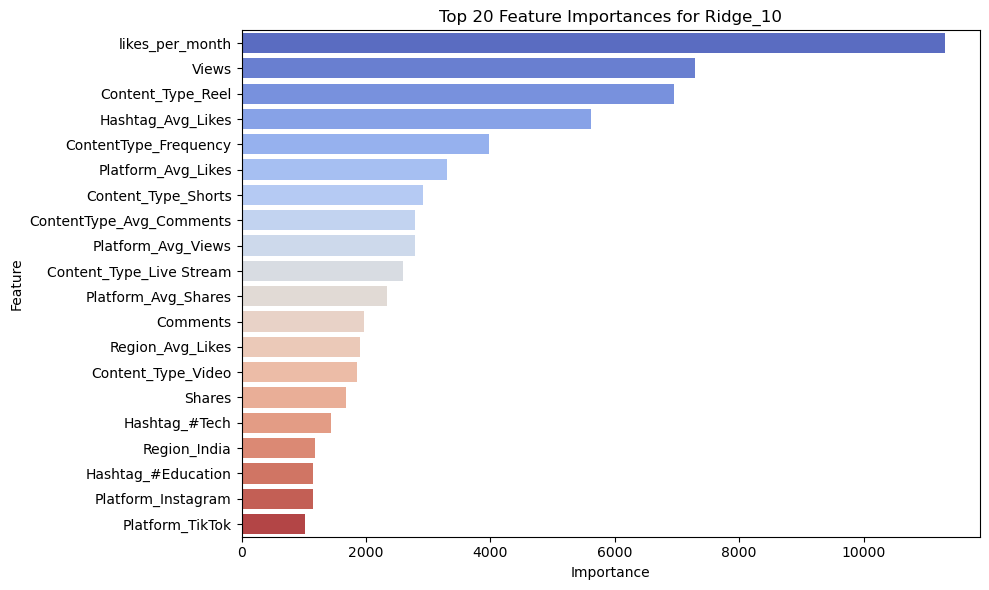


Feature Importances for Ridge_100:
                     Feature    Importance
22           likes_per_month  10998.325022
0                      Views   7108.024722
6          Hashtag_Avg_Likes   5470.450009
49         Content_Type_Reel   5120.291490
19     ContentType_Frequency   3860.472470
7         Platform_Avg_Likes   3198.522387
15  ContentType_Avg_Comments   2641.086589
4         Platform_Avg_Views   2522.194817
10       Platform_Avg_Shares   2374.657255
47  Content_Type_Live Stream   2178.313508


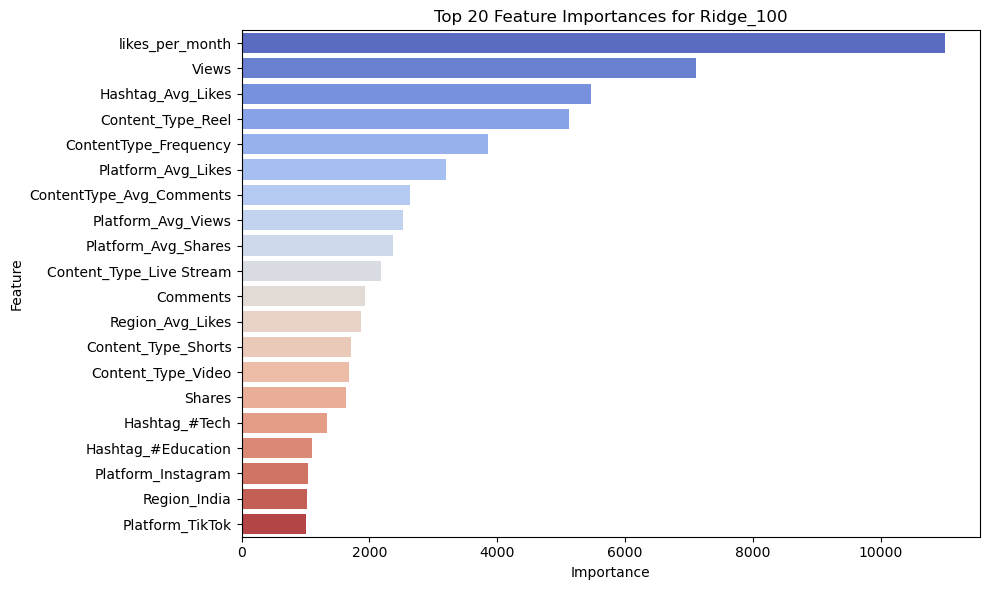


=== Regression Baseline Models on Comments ===

🔵 Training LinearRegression ...
   Test MAE: 12643.91 | Test RMSE: 14655.06 | Test R2: -0.01

🔵 Training Ridge_1 ...
   Test MAE: 12643.89 | Test RMSE: 14655.01 | Test R2: -0.01

🔵 Training Ridge_10 ...
   Test MAE: 12643.68 | Test RMSE: 14654.55 | Test R2: -0.01

🔵 Training Ridge_100 ...
   Test MAE: 12641.88 | Test RMSE: 14650.38 | Test R2: -0.01

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 12201.951177 14154.238139  0.011217 12643.910906 14655.062891 -0.011081
         Ridge_1 12201.960962 14154.238149  0.011217 12643.887281 14655.010457 -0.011074
        Ridge_10 12202.049427 14154.239075  0.011217 12643.678478 14654.545070 -0.011010
       Ridge_100 12203.020286 14154.312035  0.011207 12641.884369 14650.382444 -0.010435

Feature Importances for LinearRegression:
                     Feature   Importance
24        comments_per_month  1151.270

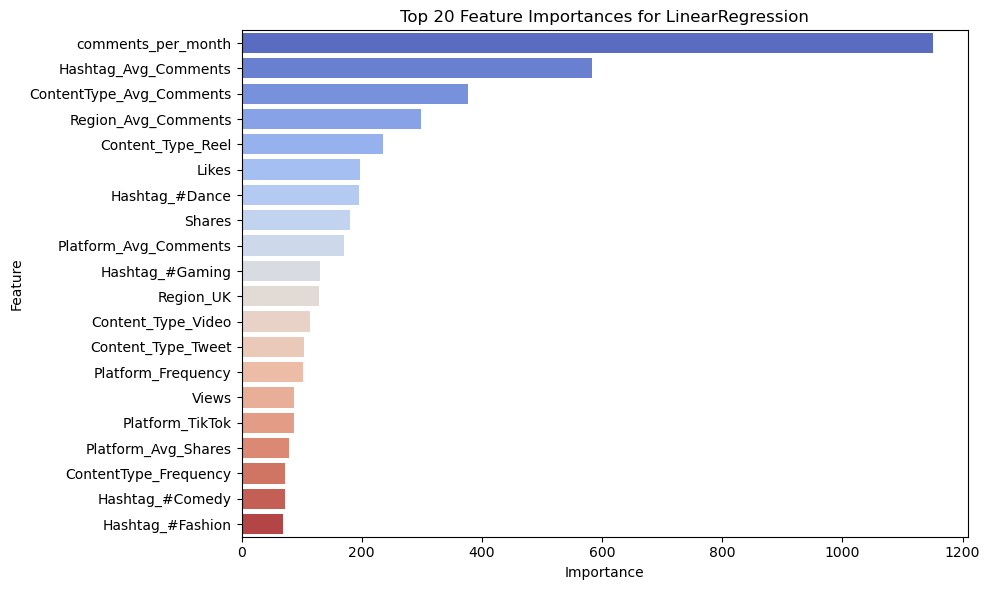


Feature Importances for Ridge_1:
                     Feature   Importance
24        comments_per_month  1150.955612
12      Hashtag_Avg_Comments   582.874714
15  ContentType_Avg_Comments   377.403124
14       Region_Avg_Comments   298.677124
49         Content_Type_Reel   233.810513
1                      Likes   196.541122
31            Hashtag_#Dance   194.738253
2                     Shares   180.290747
13     Platform_Avg_Comments   170.007096
35           Hashtag_#Gaming   129.829641


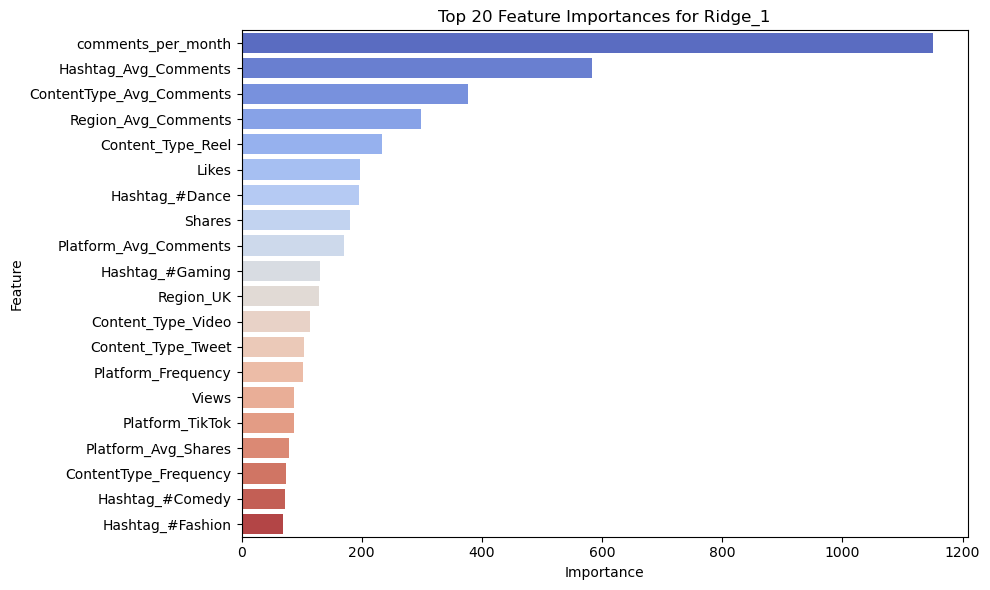


Feature Importances for Ridge_10:
                     Feature   Importance
24        comments_per_month  1148.126032
12      Hashtag_Avg_Comments   581.272181
15  ContentType_Avg_Comments   375.553201
14       Region_Avg_Comments   297.726501
49         Content_Type_Reel   225.721728
1                      Likes   196.105742
31            Hashtag_#Dance   192.261374
2                     Shares   179.865369
13     Platform_Avg_Comments   169.837277
35           Hashtag_#Gaming   128.578737


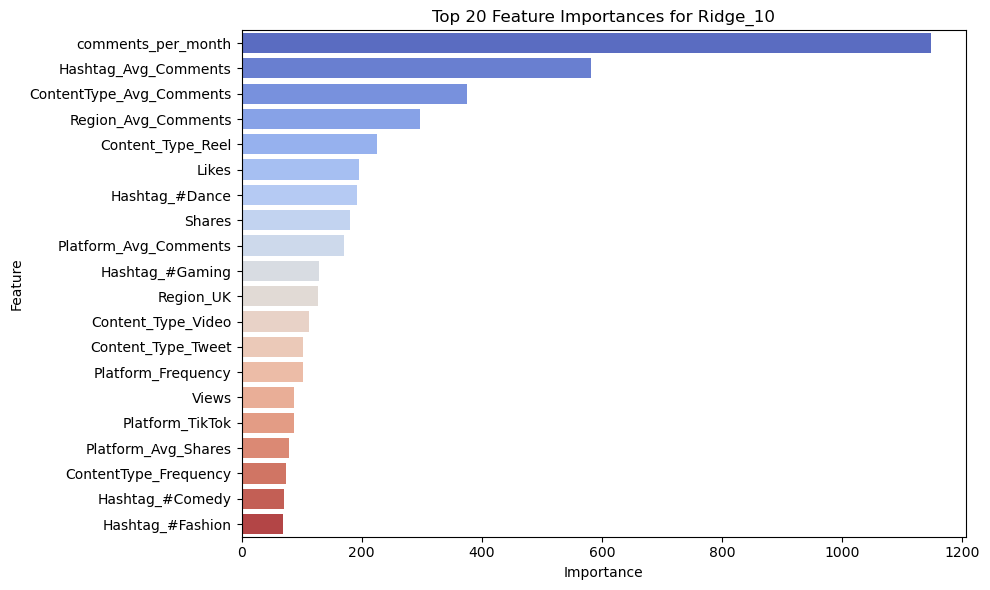


Feature Importances for Ridge_100:
                     Feature   Importance
24        comments_per_month  1120.618799
12      Hashtag_Avg_Comments   565.659329
15  ContentType_Avg_Comments   359.258596
14       Region_Avg_Comments   288.951709
1                      Likes   191.751223
2                     Shares   175.601634
31            Hashtag_#Dance   172.156360
49         Content_Type_Reel   170.680814
13     Platform_Avg_Comments   167.957979
45                 Region_UK   119.787401


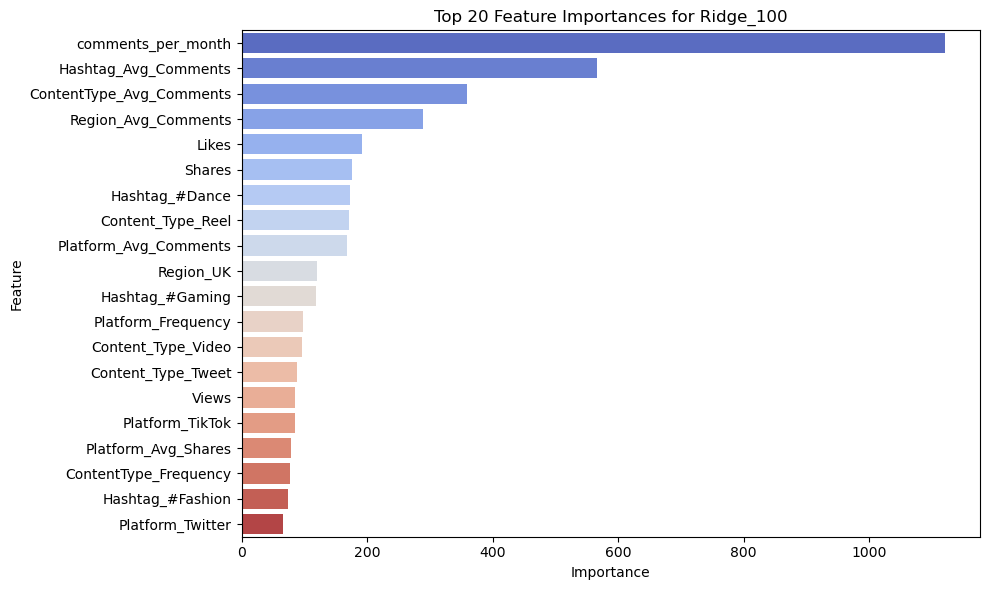


=== Regression Baseline Models on Shares ===

🔵 Training LinearRegression ...
   Test MAE: 25319.30 | Test RMSE: 29191.75 | Test R2: -0.02

🔵 Training Ridge_1 ...
   Test MAE: 25319.11 | Test RMSE: 29191.56 | Test R2: -0.02

🔵 Training Ridge_10 ...
   Test MAE: 25317.49 | Test RMSE: 29189.86 | Test R2: -0.02

🔵 Training Ridge_100 ...
   Test MAE: 25304.74 | Test RMSE: 29176.04 | Test R2: -0.02

📘 Regression Baseline Results:
           Model    Train MAE   Train RMSE  Train R2     Test MAE    Test RMSE   Test R2
LinearRegression 25079.908999 28926.584413  0.010809 25319.295533 29191.750640 -0.021669
         Ridge_1 25079.919895 28926.584562  0.010809 25319.110198 29191.557194 -0.021655
        Ridge_10 25080.055229 28926.598284  0.010808 25317.490396 29189.863642 -0.021537
       Ridge_100 25081.980032 28927.373576  0.010755 25304.738890 29176.042387 -0.020570

Feature Importances for LinearRegression:
                     Feature   Importance
23          shares_per_month  2181.36355

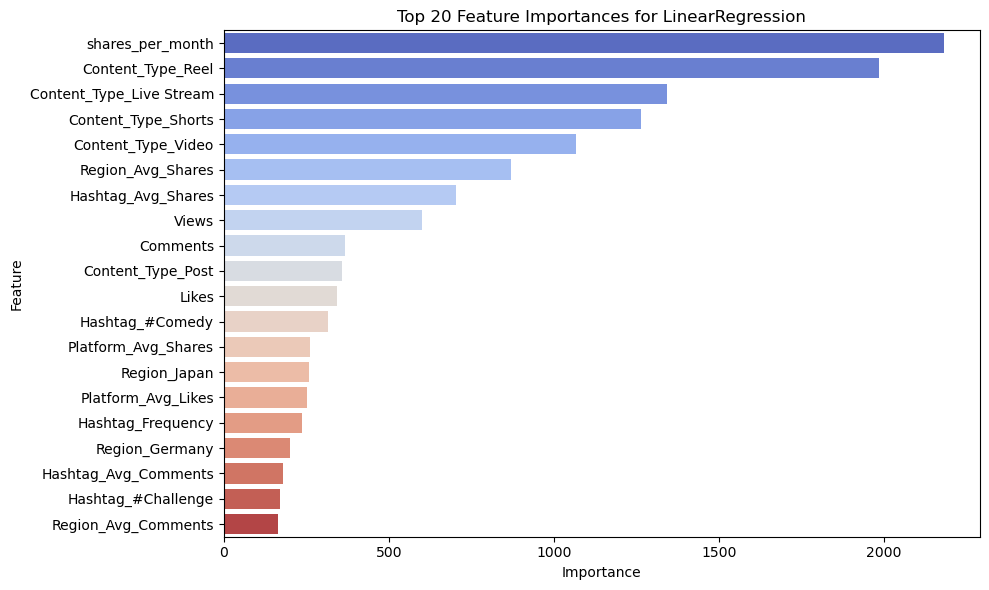


Feature Importances for Ridge_1:
                     Feature   Importance
23          shares_per_month  2180.765269
49         Content_Type_Reel  1976.121195
47  Content_Type_Live Stream  1338.862840
50       Content_Type_Shorts  1255.760405
52        Content_Type_Video  1065.116019
11         Region_Avg_Shares   868.765886
9         Hashtag_Avg_Shares   704.493809
0                      Views   599.951560
2                   Comments   368.531403
48         Content_Type_Post   358.546323


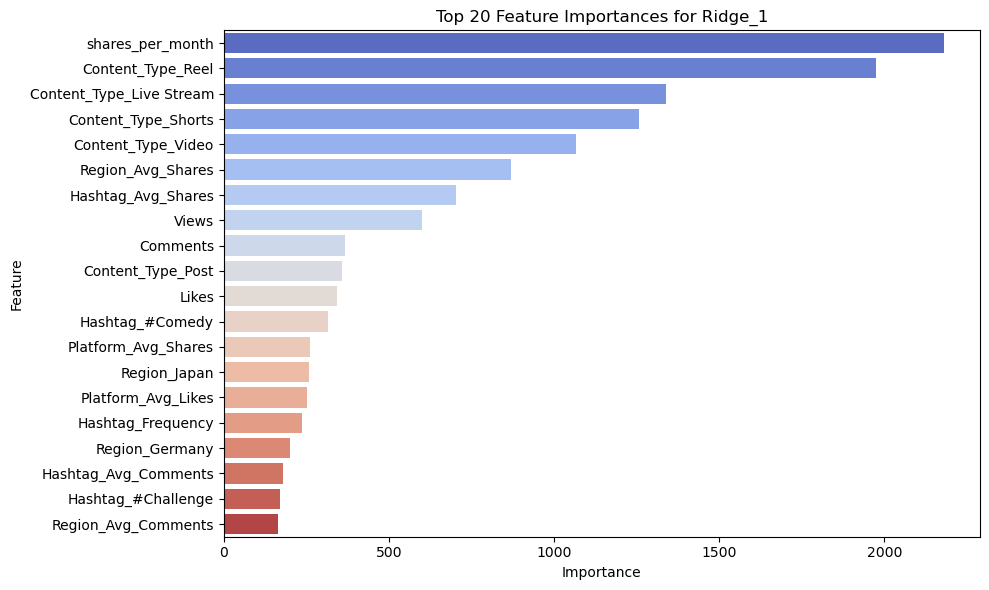


Feature Importances for Ridge_10:
                     Feature   Importance
23          shares_per_month  2175.378348
49         Content_Type_Reel  1899.000889
47  Content_Type_Live Stream  1319.227964
50       Content_Type_Shorts  1200.139102
52        Content_Type_Video  1055.705662
11         Region_Avg_Shares   865.985603
9         Hashtag_Avg_Shares   701.577607
0                      Views   598.955431
2                   Comments   367.668089
48         Content_Type_Post   357.459530


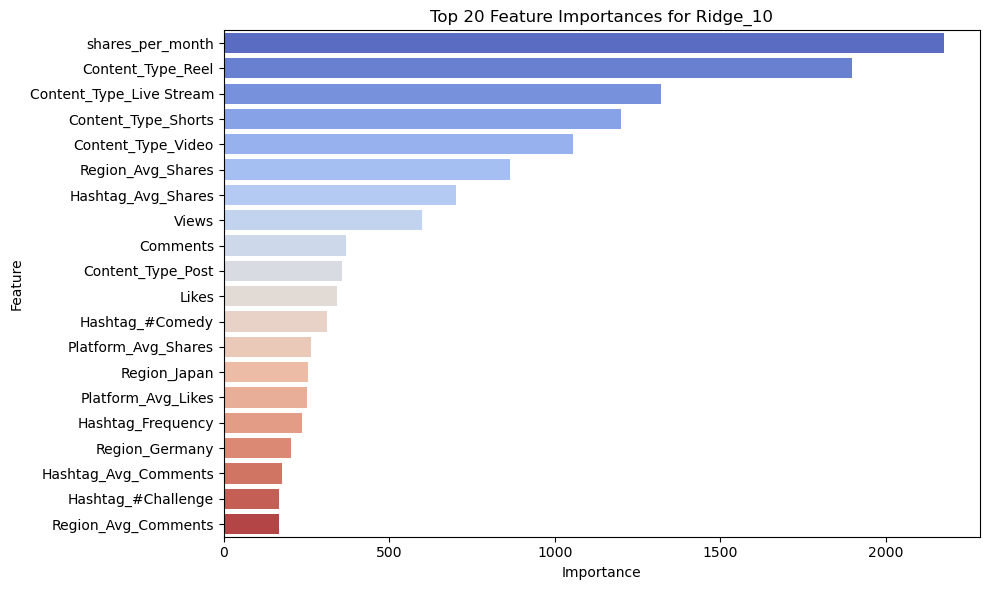


Feature Importances for Ridge_100:
                     Feature   Importance
23          shares_per_month  2121.971339
49         Content_Type_Reel  1373.187393
47  Content_Type_Live Stream  1150.649141
52        Content_Type_Video   969.866622
11         Region_Avg_Shares   840.823685
50       Content_Type_Shorts   830.843493
9         Hashtag_Avg_Shares   675.424747
0                      Views   588.371750
2                   Comments   358.992730
48         Content_Type_Post   344.404575


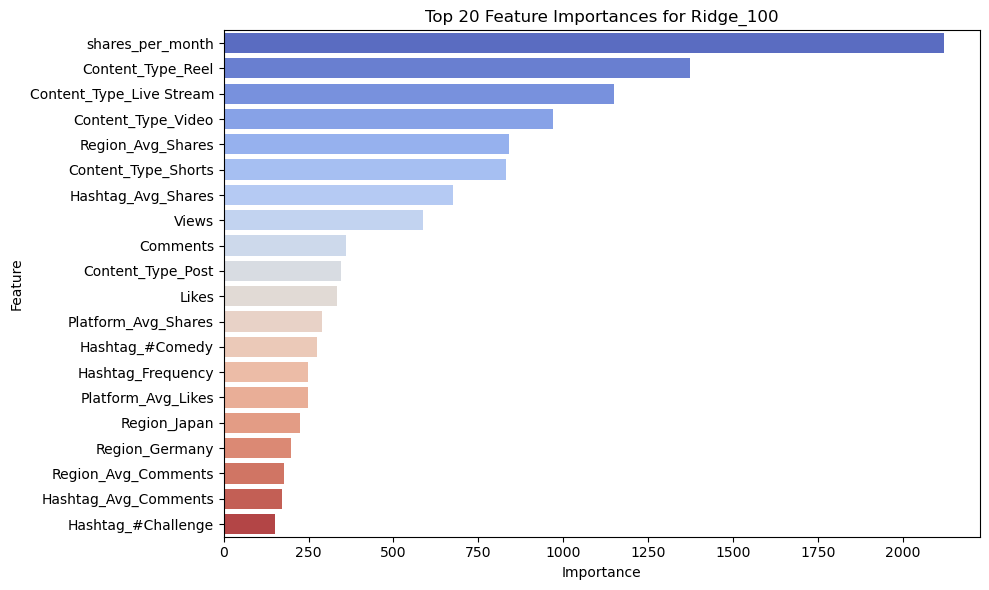


=== Classification Baseline Models ===

🟢 Training LogisticRegression ...
   Test Accuracy: 0.77 | Test Precision: 0.83 | Test Recall: 0.77 | Test F1: 0.79

================ TRAIN METRICS ================

              precision    recall  f1-score   support

           0       0.17      0.63      0.27       153
           1       0.41      0.38      0.39       450
           2       0.96      0.84      0.90      3181

    accuracy                           0.78      3784
   macro avg       0.51      0.62      0.52      3784
weighted avg       0.86      0.78      0.81      3784


================ TEST METRICS ================

              precision    recall  f1-score   support

           0       0.17      0.55      0.25        42
           1       0.29      0.23      0.26       118
           2       0.94      0.86      0.90       786

    accuracy                           0.77       946
   macro avg       0.47      0.54      0.47       946
weighted avg       0.83      0.77    

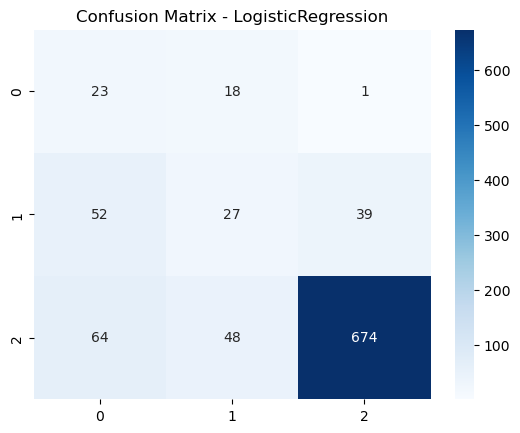


🟢 Training DecisionTree ...
   Test Accuracy: 0.73 | Test Precision: 0.83 | Test Recall: 0.73 | Test F1: 0.77

================ TRAIN METRICS ================

              precision    recall  f1-score   support

           0       0.19      0.89      0.31       153
           1       0.41      0.38      0.39       450
           2       0.97      0.80      0.88      3181

    accuracy                           0.76      3784
   macro avg       0.52      0.69      0.53      3784
weighted avg       0.87      0.76      0.80      3784


================ TEST METRICS ================

              precision    recall  f1-score   support

           0       0.14      0.57      0.23        42
           1       0.29      0.26      0.28       118
           2       0.94      0.80      0.87       786

    accuracy                           0.73       946
   macro avg       0.46      0.55      0.46       946
weighted avg       0.83      0.73      0.77       946


============== TEST CONFUSI

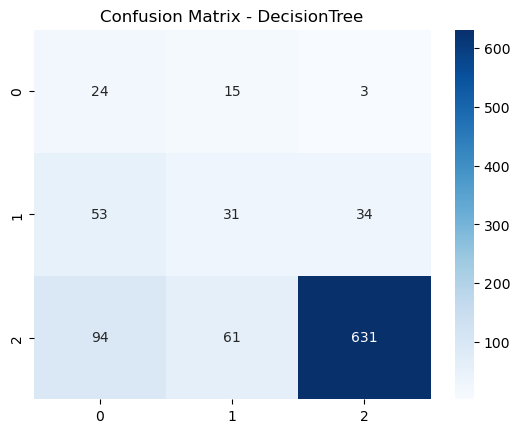


📗 Classification Baseline Results:
             Model  Train Accuracy  Train Precision  Train Recall  Train F1 Score  Test Accuracy  Test Precision  Test Recall  Test F1 Score
LogisticRegression        0.779070         0.860159      0.779070        0.811108       0.765328        0.827880     0.765328       0.789879
      DecisionTree        0.757135         0.867901      0.757135        0.797117       0.725159        0.827215     0.725159       0.765528

Feature Importances (Classification) - LogisticRegression
                     Feature  Importance
10     Platform_Avg_Comments    0.715034
24          Platform_Twitter    0.431283
7        Platform_Avg_Shares    0.404775
14        Platform_Frequency    0.282780
23           Platform_TikTok    0.278187
46         Content_Type_Reel    0.230373
47       Content_Type_Shorts    0.194757
33            Hashtag_#Music    0.193223
44  Content_Type_Live Stream    0.189117
25          Platform_YouTube    0.155911


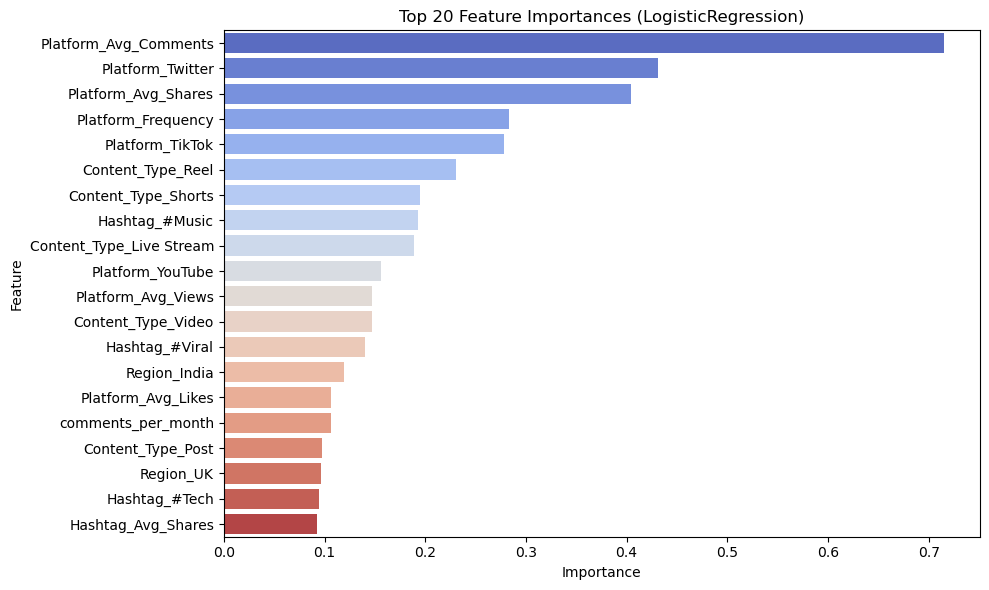


Feature Importances (Classification) - DecisionTree
                Feature  Importance
0     Hashtag_Avg_Views        0.02
1    Platform_Avg_Views        0.02
2      Region_Avg_Views        0.02
3     Hashtag_Avg_Likes        0.02
4    Platform_Avg_Likes        0.02
5      Region_Avg_Likes        0.02
6    Hashtag_Avg_Shares        0.02
7   Platform_Avg_Shares        0.02
8     Region_Avg_Shares        0.02
9  Hashtag_Avg_Comments        0.02


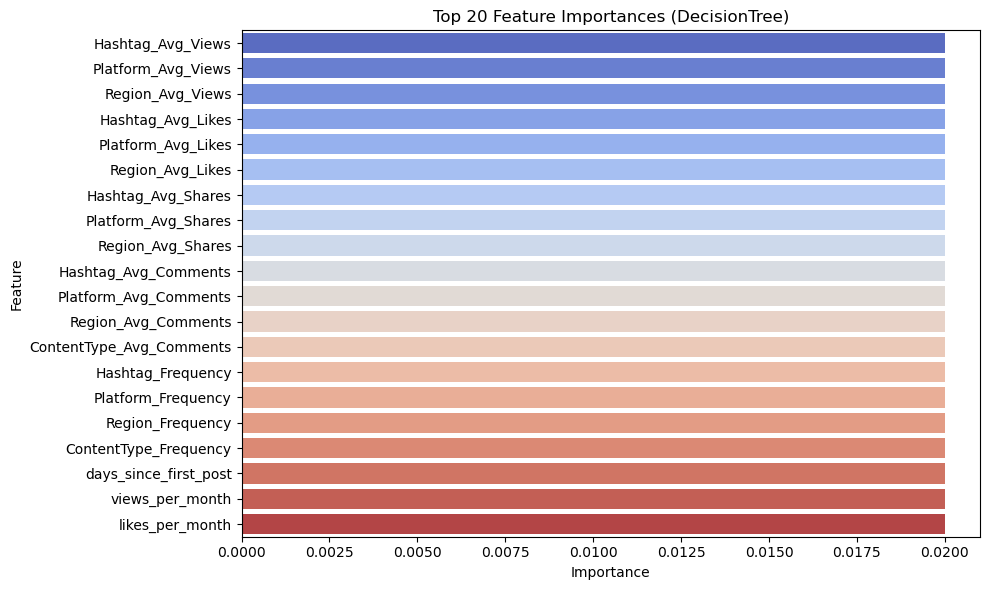

In [8]:
# Regression Models on Views
print("\n=== Regression Baseline Models on Views ===")
reg_views_model = SupervisedBaselineModels(X_train_reg_views, X_test_reg_views, y_train_reg_views, y_test_reg_views, feature_names_reg_views, task='regression', pred='views')
reg_views_model.train_and_evaluate()
reg_views_model.results()
reg_views_model.feature_importance()

# Regression Models on Likes
print("\n=== Regression Baseline Models on Likes ===")
reg_likes_model = SupervisedBaselineModels(X_train_reg_likes, X_test_reg_likes, y_train_reg_likes, y_test_reg_likes, feature_names_reg_likes, task='regression', pred='likes')
reg_likes_model.train_and_evaluate()
reg_likes_model.results()
reg_likes_model.feature_importance()

# Regression Models on Comments
print("\n=== Regression Baseline Models on Comments ===")
reg_comments_model = SupervisedBaselineModels(X_train_reg_comments, X_test_reg_comments, y_train_reg_comments, y_test_reg_comments, feature_names_reg_comments, task='regression', pred='shares')
reg_comments_model.train_and_evaluate()
reg_comments_model.results()
reg_comments_model.feature_importance()

# Regression Models on Shares
print("\n=== Regression Baseline Models on Shares ===")
reg_shares_model = SupervisedBaselineModels(X_train_reg_shares, X_test_reg_shares, y_train_reg_shares, y_test_reg_shares, feature_names_reg_shares, task='regression', pred='comments')
reg_shares_model.train_and_evaluate()
reg_shares_model.results()
reg_shares_model.feature_importance()

# Classification Models
print("\n=== Classification Baseline Models ===")
cls_model = SupervisedBaselineModels(X_train_cls, X_test_cls, y_train_cls, y_test_cls, feature_names_cls, task='classification', pred='enagegement_level')
cls_model.train_and_evaluate()  
cls_model.results()
cls_model.feature_importance()